In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Create dataset

X = 6 * np.random.rand(100,1) - 3
Y = 0.5 * X ** 2 + 1.5 * X + 2 + np.random.randn(100, 1) 

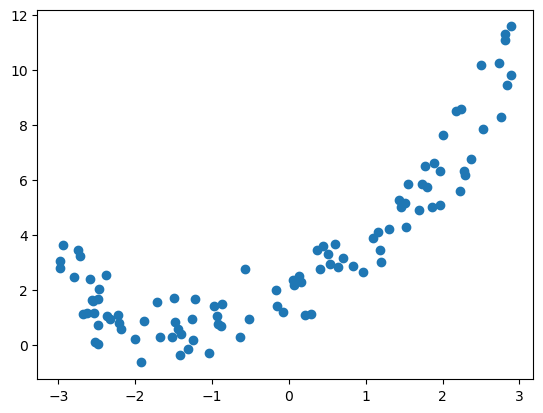

In [3]:
## Visualize the dataset
plt.scatter(X, Y)

In [4]:
### Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42 )

In [6]:
## Implement linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [7]:
## R2_score
from sklearn.metrics import r2_score
r2_score(y_test, regression.predict(X_test))

0.27517413522047407

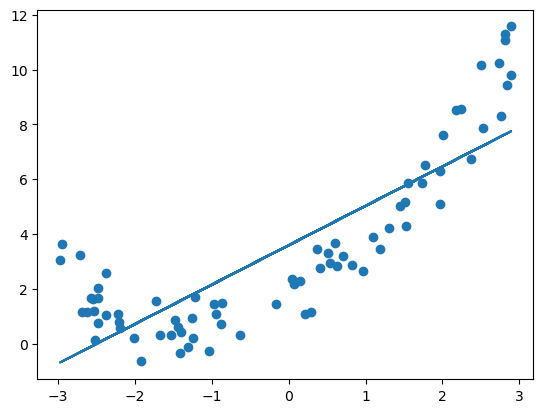

In [11]:
## Visualize the model
plt.plot(X_train, regression.predict(X_train))
plt.scatter(X_train, y_train)

In [13]:
### Lets apply polynomial regression due to the r2_score is very less 
### Its not a linear regression as per the above visualization 

from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures()
X_train_poly = polynomial.fit_transform(X_train)
X_test_poly = polynomial.transform(X_test)

In [15]:
X_train_poly

array([[ 1.00000000e+00,  2.88929848e+00,  8.34804573e+00],
       [ 1.00000000e+00,  4.03715552e-01,  1.62986247e-01],
       [ 1.00000000e+00, -2.48483110e+00,  6.17438560e+00],
       [ 1.00000000e+00, -2.71554464e+00,  7.37418267e+00],
       [ 1.00000000e+00, -8.67465866e-01,  7.52497028e-01],
       [ 1.00000000e+00,  9.67010842e-01,  9.35109969e-01],
       [ 1.00000000e+00,  2.84082326e+00,  8.07027678e+00],
       [ 1.00000000e+00, -1.03784534e+00,  1.07712295e+00],
       [ 1.00000000e+00, -2.51959726e+00,  6.34837033e+00],
       [ 1.00000000e+00, -2.62708267e+00,  6.90156337e+00],
       [ 1.00000000e+00, -1.41189017e+00,  1.99343385e+00],
       [ 1.00000000e+00, -2.53631913e+00,  6.43291471e+00],
       [ 1.00000000e+00,  7.03396585e-01,  4.94766755e-01],
       [ 1.00000000e+00, -1.52350469e+00,  2.32106655e+00],
       [ 1.00000000e+00, -2.20763272e+00,  4.87364223e+00],
       [ 1.00000000e+00, -2.00680889e+00,  4.02728192e+00],
       [ 1.00000000e+00,  1.51971852e-01

In [17]:
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)


In [18]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7174560663903138
